In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from vae import VAE


## Load Waveforms

In [2]:
from scipy.io import loadmat
name = 'waveforms-R10_IL1B_TNF_03.mat'
model_name = 'waveforms-50epochs-R10_IL1B_TNF_03'
waveforms = loadmat(name)['waveforms']
waveforms = waveforms.reshape(waveforms.shape + (1,)).astype('float32')
waveforms = tf.keras.utils.normalize(waveforms, axis=0)
#waveforms = transform_waveforms(waveforms)
no_training_samples = int(waveforms.shape[0]*0.8)
x_train = waveforms[:no_training_samples]
x_test = waveforms[no_training_samples:]

waves_bool = True
signal_shape = (141,1)
batch_size = 100
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).shuffle(x_test.shape[0]).batch(batch_size)
print(f'Shape of waveforms: {waveforms.shape}')

Shape of waveforms: (640504, 141, 1)


## PLOT INPUT WAVEFORMS

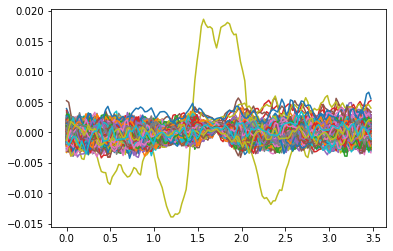

In [3]:
t_ax = np.arange(0,3.5,3.5/141)*np.ones((1000,1))
t_ax.shape
plt.plot(t_ax.T,waveforms[300000:301000,:,0].T)
plt.show()

In [3]:

## RUN MODEL

epochs = 5
vae = VAE(latent_dim=2, arch_type=2, signal_shape=signal_shape, waveforms=waves_bool, batch_size=batch_size)
#vae.train(epochs, train_dataset, test_dataset)
#vae.save_model(model_name)
vae.load_model(model_name)

In [7]:
from plot_functions_wf import *
#plot_latent(vae.encoder, vae.decoder, saveas=None,verbose=2)
labels = np.ones((x_train.shape[0],1))[:,0]
plot_label_clusters(vae, x_train, labels)

latent mean calculated.


In [6]:
np.ones((x_train.shape[0],1)).shape


(512403, 1)